# WeatherPy
----



Observations
- City Latitude and Temp have a strong relationship. They have a strong negative corellation for the Northern hemisphere and a strong positive corellation for the Southern hemisphere. 
- For  Humidity - there is a slight positive relationship for both Northern and Southern hemispheres, but the corellation is very weak for both graphs. 
- For  Cloudiness - there is a slight positive relationship for both Northern and Southern hemispheres, but the corellation is very weak for both graphs. 
- For  Windspeed - there is a slight negative relationship for both Northern and Southern hemispheres, but the corellation is very weak for both graphs. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)


622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Config info for the Open Weather API 

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:
# set up lists to hold reponse info - list of dicts 

weather_list = []
city_data = {}
date_of_reading = 0
i=0

# Loop through the list of cities and perform a request for data on each
for city in cities:   
    time.sleep(.5)
    try:
        response = requests.get(query_url + cities[i]).json() 
        date_of_reading = (response['dt'])
        weather_list.append({ "city": (city), 
                             "country": (response['sys']['country']), 
                             "lat": (response['coord']['lat']), 
                             "lon": (response['coord']['lon']), 
                             "temp": (response['main']['temp']),
                             "temp_max": (response['main']['temp_max']),
                             "windspeed": (response['wind']['speed']),
                             "cloudall": (response['clouds']['all']),
                             "humidity": (response['main']['humidity']) 
                            } )        
        print(f"Processing city {city}   \t {i} of {len(cities)}")
        i += 1
    except:
        print(f"Could not find   \t {i} of {len(cities)}")
        i += 1
        



Processing city coquimbo   	 0 of 622
Processing city bethel   	 1 of 622
Processing city puerto ayora   	 2 of 622
Processing city punta arenas   	 3 of 622
Processing city qaanaaq   	 4 of 622
Processing city borazjan   	 5 of 622
Processing city ushuaia   	 6 of 622
Processing city kavaratti   	 7 of 622
Processing city rikitea   	 8 of 622
Processing city vilcun   	 9 of 622
Processing city salalah   	 10 of 622
Processing city waipawa   	 11 of 622
Processing city kaitangata   	 12 of 622
Processing city narrabri   	 13 of 622
Processing city maple creek   	 14 of 622
Processing city bonthe   	 15 of 622
Processing city ponta do sol   	 16 of 622
Processing city zonguldak   	 17 of 622
Processing city georgetown   	 18 of 622
Processing city barranca   	 19 of 622
Processing city bilibino   	 20 of 622
Processing city saint marys   	 21 of 622
Processing city richards bay   	 22 of 622
Processing city busselton   	 23 of 622
Processing city mataura   	 24 of 622
Processing city ri

Processing city bardiyah   	 209 of 622
Processing city hun   	 210 of 622
Processing city turukhansk   	 211 of 622
Processing city bristol   	 212 of 622
Processing city iqaluit   	 213 of 622
Processing city aquiraz   	 214 of 622
Processing city moose factory   	 215 of 622
Processing city fairview   	 216 of 622
Processing city yarensk   	 217 of 622
Processing city berezovka   	 218 of 622
Processing city souillac   	 219 of 622
Processing city ewa beach   	 220 of 622
Could not find   	 221 of 622
Processing city belyy yar   	 222 of 622
Processing city mugur-aksy   	 223 of 622
Processing city riyadh   	 224 of 622
Processing city maniitsoq   	 225 of 622
Processing city artsyz   	 226 of 622
Processing city chara   	 227 of 622
Processing city bambous virieux   	 228 of 622
Processing city nuuk   	 229 of 622
Processing city damietta   	 230 of 622
Processing city valley   	 231 of 622
Processing city itacare   	 232 of 622
Processing city omutninsk   	 233 of 622
Processing c

Processing city porto murtinho   	 417 of 622
Could not find   	 418 of 622
Processing city chokurdakh   	 419 of 622
Processing city cody   	 420 of 622
Processing city kampong chhnang   	 421 of 622
Processing city xifeng   	 422 of 622
Processing city lasa   	 423 of 622
Processing city piste   	 424 of 622
Processing city preobrazheniye   	 425 of 622
Processing city freetown   	 426 of 622
Processing city coihaique   	 427 of 622
Processing city uribia   	 428 of 622
Processing city biggar   	 429 of 622
Processing city riviere-au-renard   	 430 of 622
Processing city zhangjiakou   	 431 of 622
Processing city shelburne   	 432 of 622
Processing city aitape   	 433 of 622
Processing city ustyuzhna   	 434 of 622
Processing city mount gambier   	 435 of 622
Processing city piet retief   	 436 of 622
Processing city vardo   	 437 of 622
Processing city padang   	 438 of 622
Processing city birjand   	 439 of 622
Processing city abu samrah   	 440 of 622
Could not find   	 441 of 622

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data = pd.DataFrame(weather_list)
weather_data

,city,country,lat,lon,temp,temp_max,windspeed,cloudall,humidity
0,coquimbo,CL,-29.9533,-71.3436,60.53,60.53,11.50,20,55
1,bethel,US,41.3712,-73.4140,61.88,64.04,1.99,90,83
2,puerto ayora,EC,-0.7393,-90.3518,71.55,76.96,5.99,90,87
3,punta arenas,CL,-53.1500,-70.9167,55.51,55.51,28.77,40,54
4,qaanaaq,GL,77.4840,-69.3632,28.26,28.26,13.51,100,80
...,...,...,...,...,...,...,...,...,...
570,ndele,CF,8.4109,20.6473,74.61,74.61,2.66,100,73
571,murgab,TM,37.4966,61.9714,46.27,46.27,6.91,0,49
572,viedma,AR,-40.8135,-62.9967,71.47,71.47,13.11,0,29
573,oranjestad,AW,12.5240,-70.0270,89.55,89.55,14.97,20,62


In [7]:
#save the dataframe to a csv for later use 
weather_data.to_csv('weather_data.csv', encoding='utf-8', index=False)


In [8]:
#rename columns 
weather_data.rename(columns = {'lat' : 'Lat', 'lon' : 'Long', 'temp' : 'Temp', 'temp_max' : 'Max Temp', 'windspeed' : 'Wind','cloudall' : 'Cloudiness','humidity' : 'Humidity'}, inplace = True)
weather_data.describe()

,Lat,Long,Temp,Max Temp,Wind,Cloudiness,Humidity
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,19.812210,18.085699,61.970035,62.648835,8.209896,52.302609,70.109565
std,33.565923,89.449781,18.480470,18.558751,5.449295,39.996980,21.586311
min,-54.800000,-175.200000,1.630000,1.630000,0.000000,0.000000,7.000000
25%,-7.791350,-62.328750,48.385000,48.950000,4.000000,6.500000,61.000000
50%,25.176800,25.086500,65.590000,66.670000,6.910000,58.000000,76.000000
75%,47.231650,94.091650,76.985000,77.405000,11.500000,94.000000,86.000000
max,78.218600,179.316700,94.370000,98.510000,35.610000,100.000000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_data = weather_data.loc[(weather_data['Humidity'] < 100)]
weather_data

,city,country,Lat,Long,Temp,Max Temp,Wind,Cloudiness,Humidity
0,coquimbo,CL,-29.9533,-71.3436,60.53,60.53,11.50,20,55
1,bethel,US,41.3712,-73.4140,61.88,64.04,1.99,90,83
2,puerto ayora,EC,-0.7393,-90.3518,71.55,76.96,5.99,90,87
3,punta arenas,CL,-53.1500,-70.9167,55.51,55.51,28.77,40,54
4,qaanaaq,GL,77.4840,-69.3632,28.26,28.26,13.51,100,80
...,...,...,...,...,...,...,...,...,...
570,ndele,CF,8.4109,20.6473,74.61,74.61,2.66,100,73
571,murgab,TM,37.4966,61.9714,46.27,46.27,6.91,0,49
572,viedma,AR,-40.8135,-62.9967,71.47,71.47,13.11,0,29
573,oranjestad,AW,12.5240,-70.0270,89.55,89.55,14.97,20,62


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

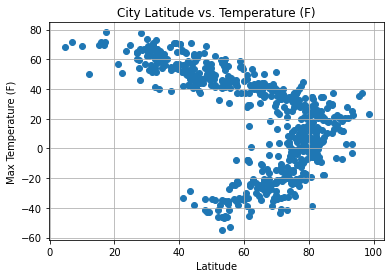

In [10]:
# Generate a scatter plot of Latitute vs Temp 

x_axis = weather_data["Max Temp"]
y_axis = weather_data["Lat"]

plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (F)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.savefig("LatandTemp.png")
plt.show()




## Latitude vs. Humidity Plot

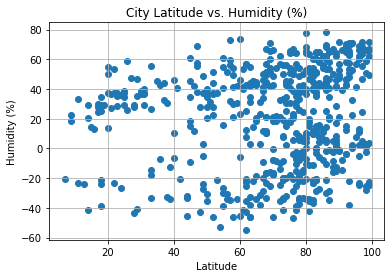

In [11]:
# Generate a scatter plot of Latitute vs Humidity 

x_axis = weather_data["Humidity"]
y_axis = weather_data["Lat"]

plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot

plt.savefig("LatandHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

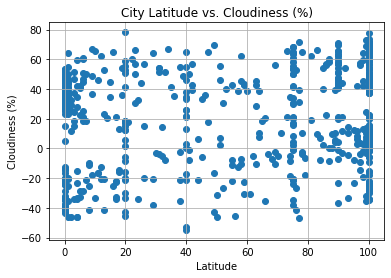

In [12]:
# Generate a scatter plot of Latitute vs Cloudiness 

x_axis = weather_data["Cloudiness"]
y_axis = weather_data["Lat"]

plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot

plt.savefig("LatandCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

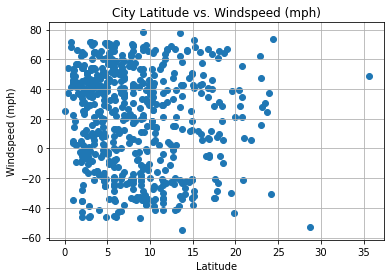

In [13]:
#Generate a scatter plot of Latitute vs Windspeed 

x_axis = weather_data["Wind"]
y_axis = weather_data["Lat"]

plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Windspeed (mph)")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.savefig("LatandWindSpeed.png")
plt.show()


## Linear Regression

In [14]:
# Create a Northern Hemisphere df and a Southern Hemisphere df

weather_data_north = weather_data.loc[(weather_data['Lat'] >= 0 )]

weather_data_south = weather_data.loc[(weather_data['Lat'] < 0 )]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

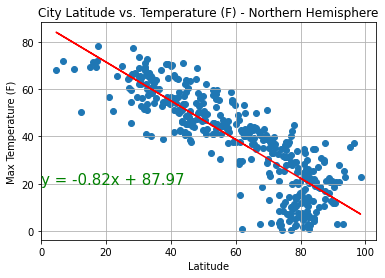

-0.8492623244572276
0.025839042959010468


In [28]:

x_values = weather_data_north["Max Temp"]
y_values = weather_data_north["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (F) - Northern Hemisphere")
plt.annotate(line_eq,(0,20),fontsize=15,color="green")
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

print(rvalue)
print(stderr)



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

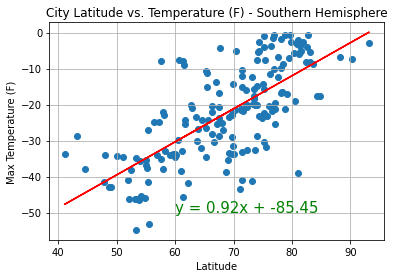

0.7112935760209426
0.06841653206154369


In [27]:
x_values = weather_data_south["Max Temp"]
y_values = weather_data_south["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (F) - Southern Hemisphere")
plt.annotate(line_eq,(60,-50),fontsize=15,color="green")
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

print(rvalue)
print(stderr)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

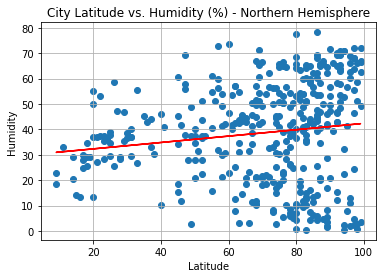

0.14072111435146148
0.04472240372551116


In [29]:

x_values = weather_data_north["Humidity"]
y_values = weather_data_north["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%) - Northern Hemisphere")
plt.annotate(line_eq,(0,70),fontsize=15,color="green")
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

print(rvalue)
print(stderr)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

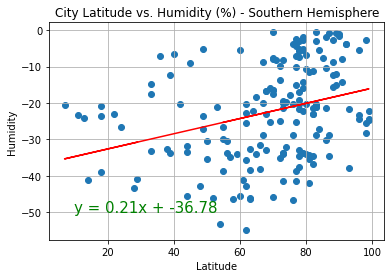

0.311301247069104
0.04799925402512458


In [30]:

x_values = weather_data_south["Humidity"]
y_values = weather_data_south["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%) - Southern Hemisphere")
plt.annotate(line_eq,(10,-50),fontsize=15,color="green")
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()
print(rvalue)
print(stderr)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

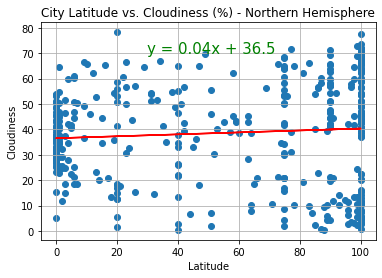

0.07741551096780364
0.024800915137631552


In [31]:


x_values = weather_data_north["Cloudiness"]
y_values = weather_data_north["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%) - Northern Hemisphere")
plt.annotate(line_eq,(30,70),fontsize=15,color="green")
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()
print(rvalue)
print(stderr)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

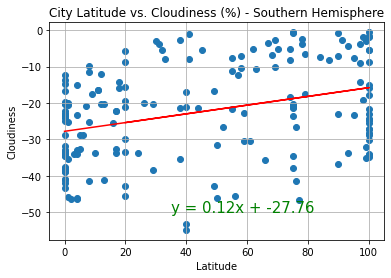

0.34533959060009456
0.024516774452897096


In [32]:

x_values = weather_data_south["Cloudiness"]
y_values = weather_data_south["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%) - Southern Hemisphere")
plt.annotate(line_eq,(35,-50),fontsize=15,color="green")
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()
print(rvalue)
print(stderr)


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

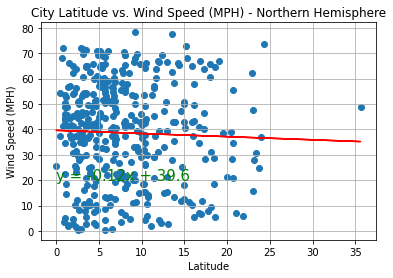

-0.03514223328896045
0.17885519755294216


In [33]:

x_values = weather_data_north["Wind"]
y_values = weather_data_north["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (MPH) - Northern Hemisphere")
plt.annotate(line_eq,(0,20),fontsize=15,color="green")
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()
print(rvalue)
print(stderr)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

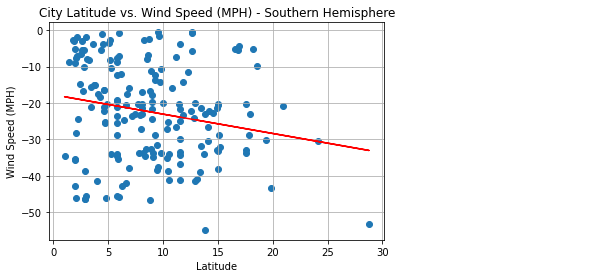

-0.202072674207008
0.19371435035441684


In [34]:

x_values = weather_data_south["Wind"]
y_values = weather_data_south["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (MPH) - Southern Hemisphere")
plt.annotate(line_eq,(35,-50),fontsize=15,color="green")
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()
print(rvalue)
print(stderr)